In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_json('Data/denoised_processed_train.json')

In [3]:
print(np.array(train.ix[0,'band_mixed']).shape)

(75, 75, 3)


C:\Users\khyeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [76]:
#from random_affine_api import RandomAffineTransform
import math
import torchvision as tv
from torchsample.transforms import TypeCast, ToTensor
from torchsample.transforms import RandomAffine, RangeNormalize, StdNormalize, RandomRotate, RandomChoiceRotate

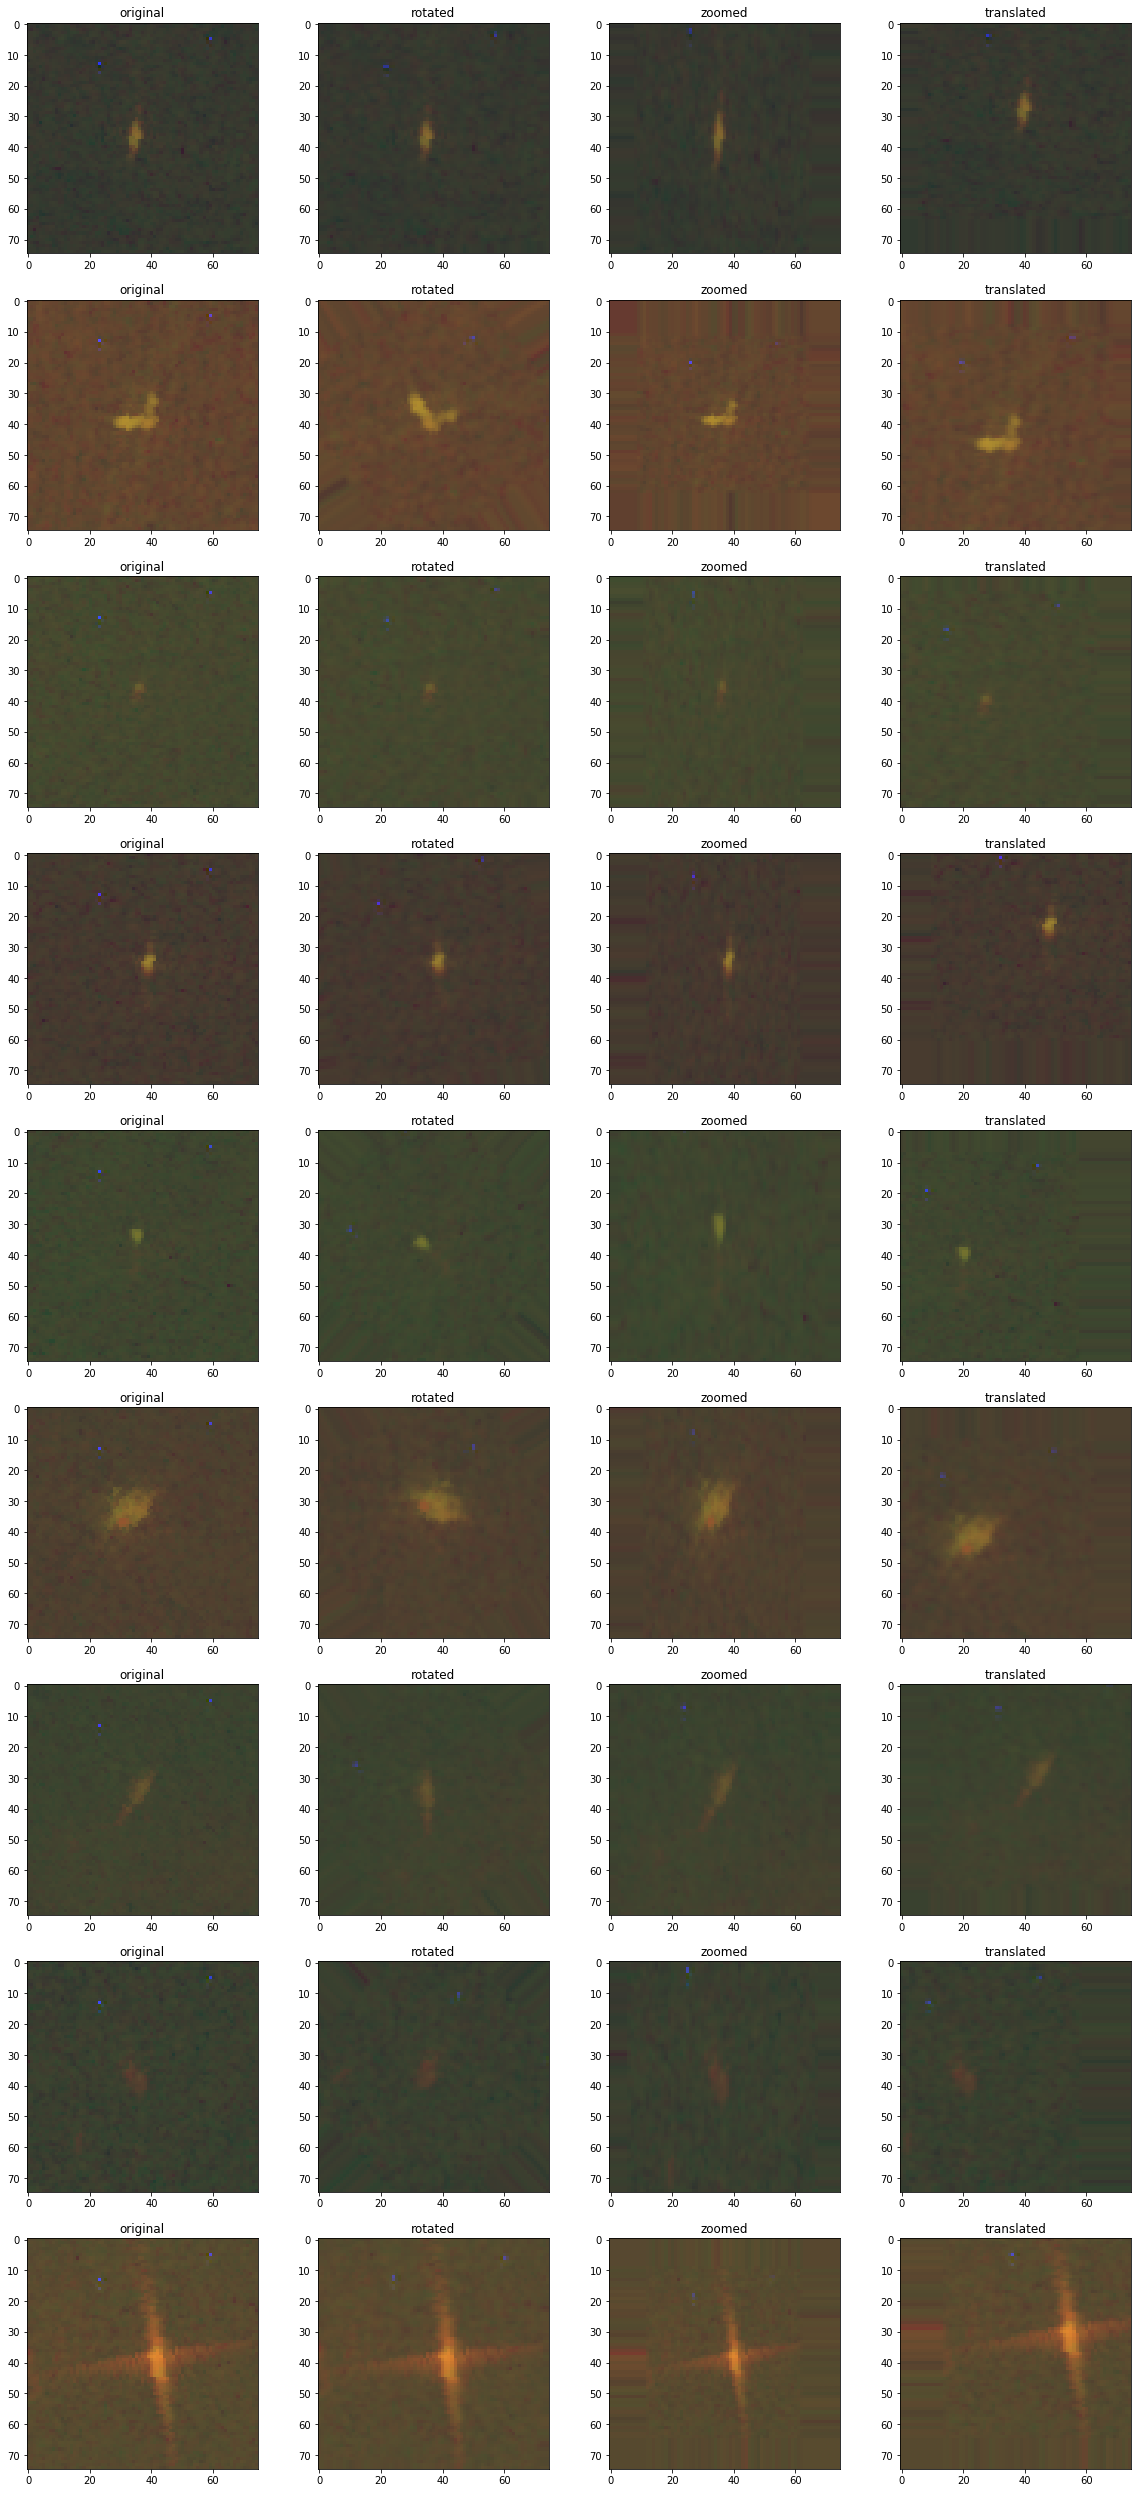

In [115]:
fig = plt.figure(1,figsize=(20,45))

# RandomAffine(rotation_range=30, translation_range=0.2, zoom_range=(0.8,1.2))
norm = RangeNormalize(0, 1)
pil_func = tv.transforms.ToPILImage()
    
for i in range(9):
    img = train.ix[i,'band_mixed']
    img = np.array(img).astype(np.uint8).reshape((75,75,3))
    img = TypeCast('float')(tv.transforms.ToTensor()(img))
    img = norm(img)
    
    ax = fig.add_subplot(9,4,4*i+1)
    ax.imshow(pil_func(img))
    ax.set_title('original')
    
      
    af = RandomAffine(rotation_range=60)
    ax = fig.add_subplot(9,4,4*i+2)
    ax.imshow(pil_func(af(img)))
    ax.set_title('rotated')
    
    af = RandomAffine(zoom_range=(0.5,1.5))
    ax = fig.add_subplot(9,4,4*i+3)
    ax.imshow(pil_func(af(img)))
    ax.set_title('zoomed')
    
    af = RandomAffine(translation_range=0.2)
    ax = fig.add_subplot(9,4,4*i+4)
    ax.imshow(pil_func(af(img)))
    ax.set_title('translated')
    
plt.show()

In [5]:
from random_affine_api import RandomAffineTransform

<PIL.Image.Image image mode=RGB size=75x75 at 0xDA20390>
<PIL.Image.Image image mode=RGB size=75x75 at 0xDE82B38>
<PIL.Image.Image image mode=RGB size=75x75 at 0xDE99B70>
<PIL.Image.Image image mode=RGB size=75x75 at 0xE1D2FD0>
<PIL.Image.Image image mode=RGB size=75x75 at 0xE3845C0>
<PIL.Image.Image image mode=RGB size=75x75 at 0xE4E1AC8>
<PIL.Image.Image image mode=RGB size=75x75 at 0xE6C3358>
<PIL.Image.Image image mode=RGB size=75x75 at 0xE870908>
<PIL.Image.Image image mode=RGB size=75x75 at 0xEA1FC50>


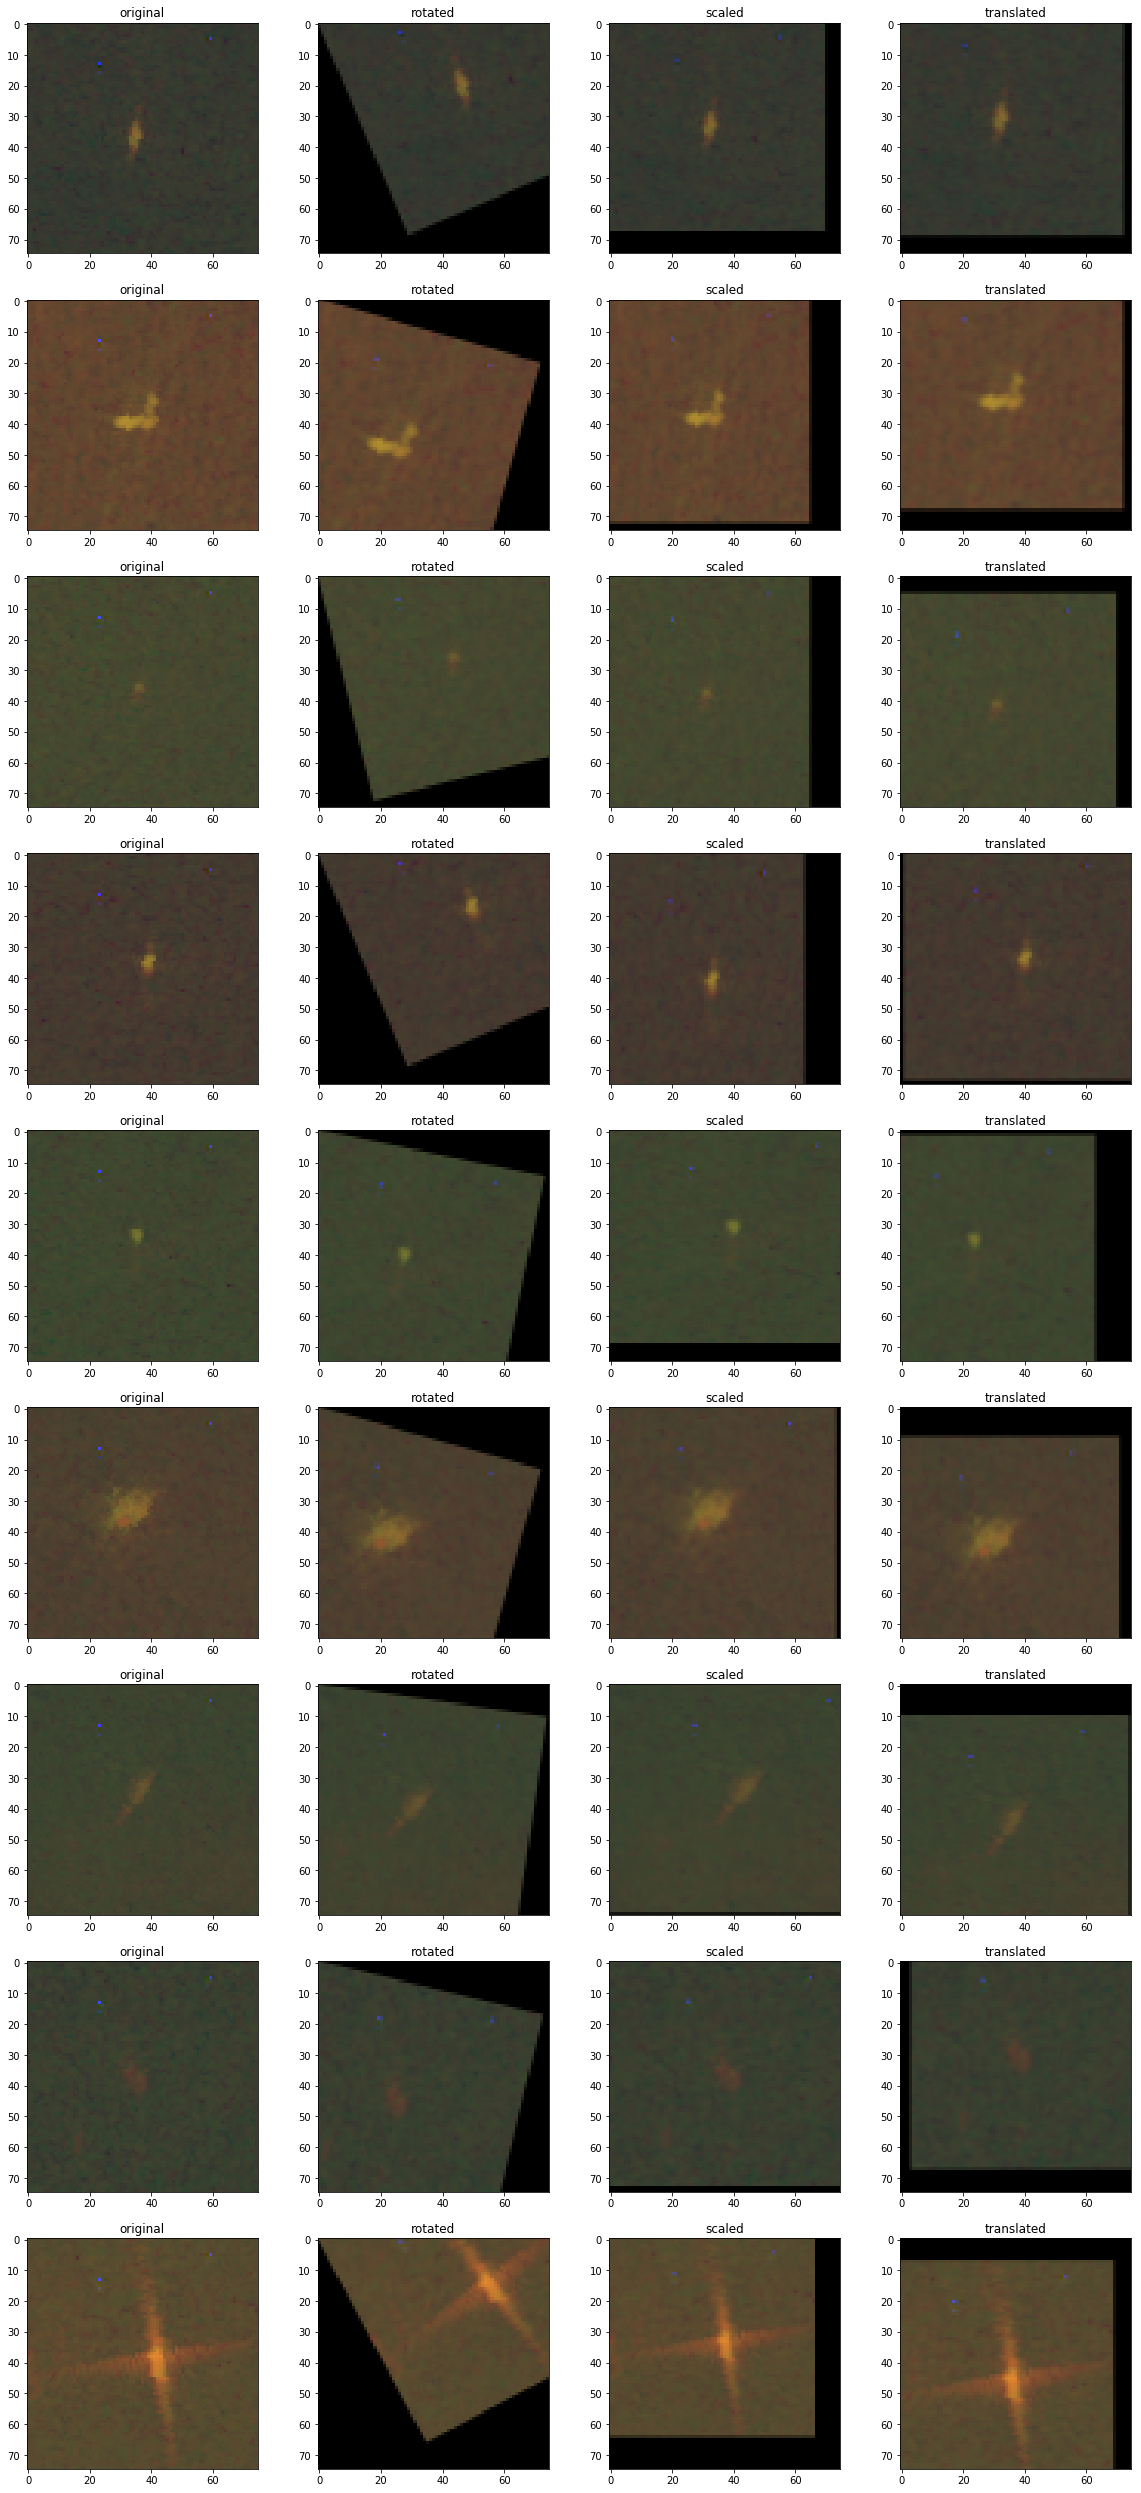

In [5]:
fig = plt.figure(1,figsize=(20,45))
for i in range(9):
    img = train.ix[i,'band_mixed']
    pil_func = tv.transforms.ToPILImage()
    img = pil_func(np.array(img).astype(np.uint8))
    print(img)
    
    ax = fig.add_subplot(9,4,4*i+1)
    ax.imshow(img)
    ax.set_title('original')
    
    rotation = (-1.*math.pi/6., 1.*math.pi/6.)
    translation = None
    scale = None
    af = RandomAffineTransform(scale_range=scale, rotation_range=rotation, translation_range=translation)
    ax = fig.add_subplot(9,4,4*i+2)
    ax.imshow(af(img))
    ax.set_title('rotated')
    
    rotation = None
    translation = None
    scale = (0.8, 1.2)
    af = RandomAffineTransform(scale_range=scale, rotation_range=rotation, translation_range=translation)
    ax = fig.add_subplot(9,4,4*i+3)
    ax.imshow(af(img))
    ax.set_title('scaled')
    
    rotation = None
    translation = (-0.2, 0.2)
    scale = None
    af = RandomAffineTransform(scale_range=scale, rotation_range=rotation, translation_range=translation)
    ax = fig.add_subplot(9,4,4*i+4)
    ax.imshow(af(img))
    ax.set_title('translated')
    
plt.show()

<PIL.Image.Image image mode=RGB size=75x75 at 0x11355390>
<PIL.Image.Image image mode=RGB size=75x75 at 0xFEBE668>
<PIL.Image.Image image mode=RGB size=75x75 at 0x10469FD0>
<PIL.Image.Image image mode=RGB size=75x75 at 0x1061E6D8>
<PIL.Image.Image image mode=RGB size=75x75 at 0x10781278>
<PIL.Image.Image image mode=RGB size=75x75 at 0x10966470>
<PIL.Image.Image image mode=RGB size=75x75 at 0x10B18908>
<PIL.Image.Image image mode=RGB size=75x75 at 0x10CCEE48>
<PIL.Image.Image image mode=RGB size=75x75 at 0x10CF90B8>


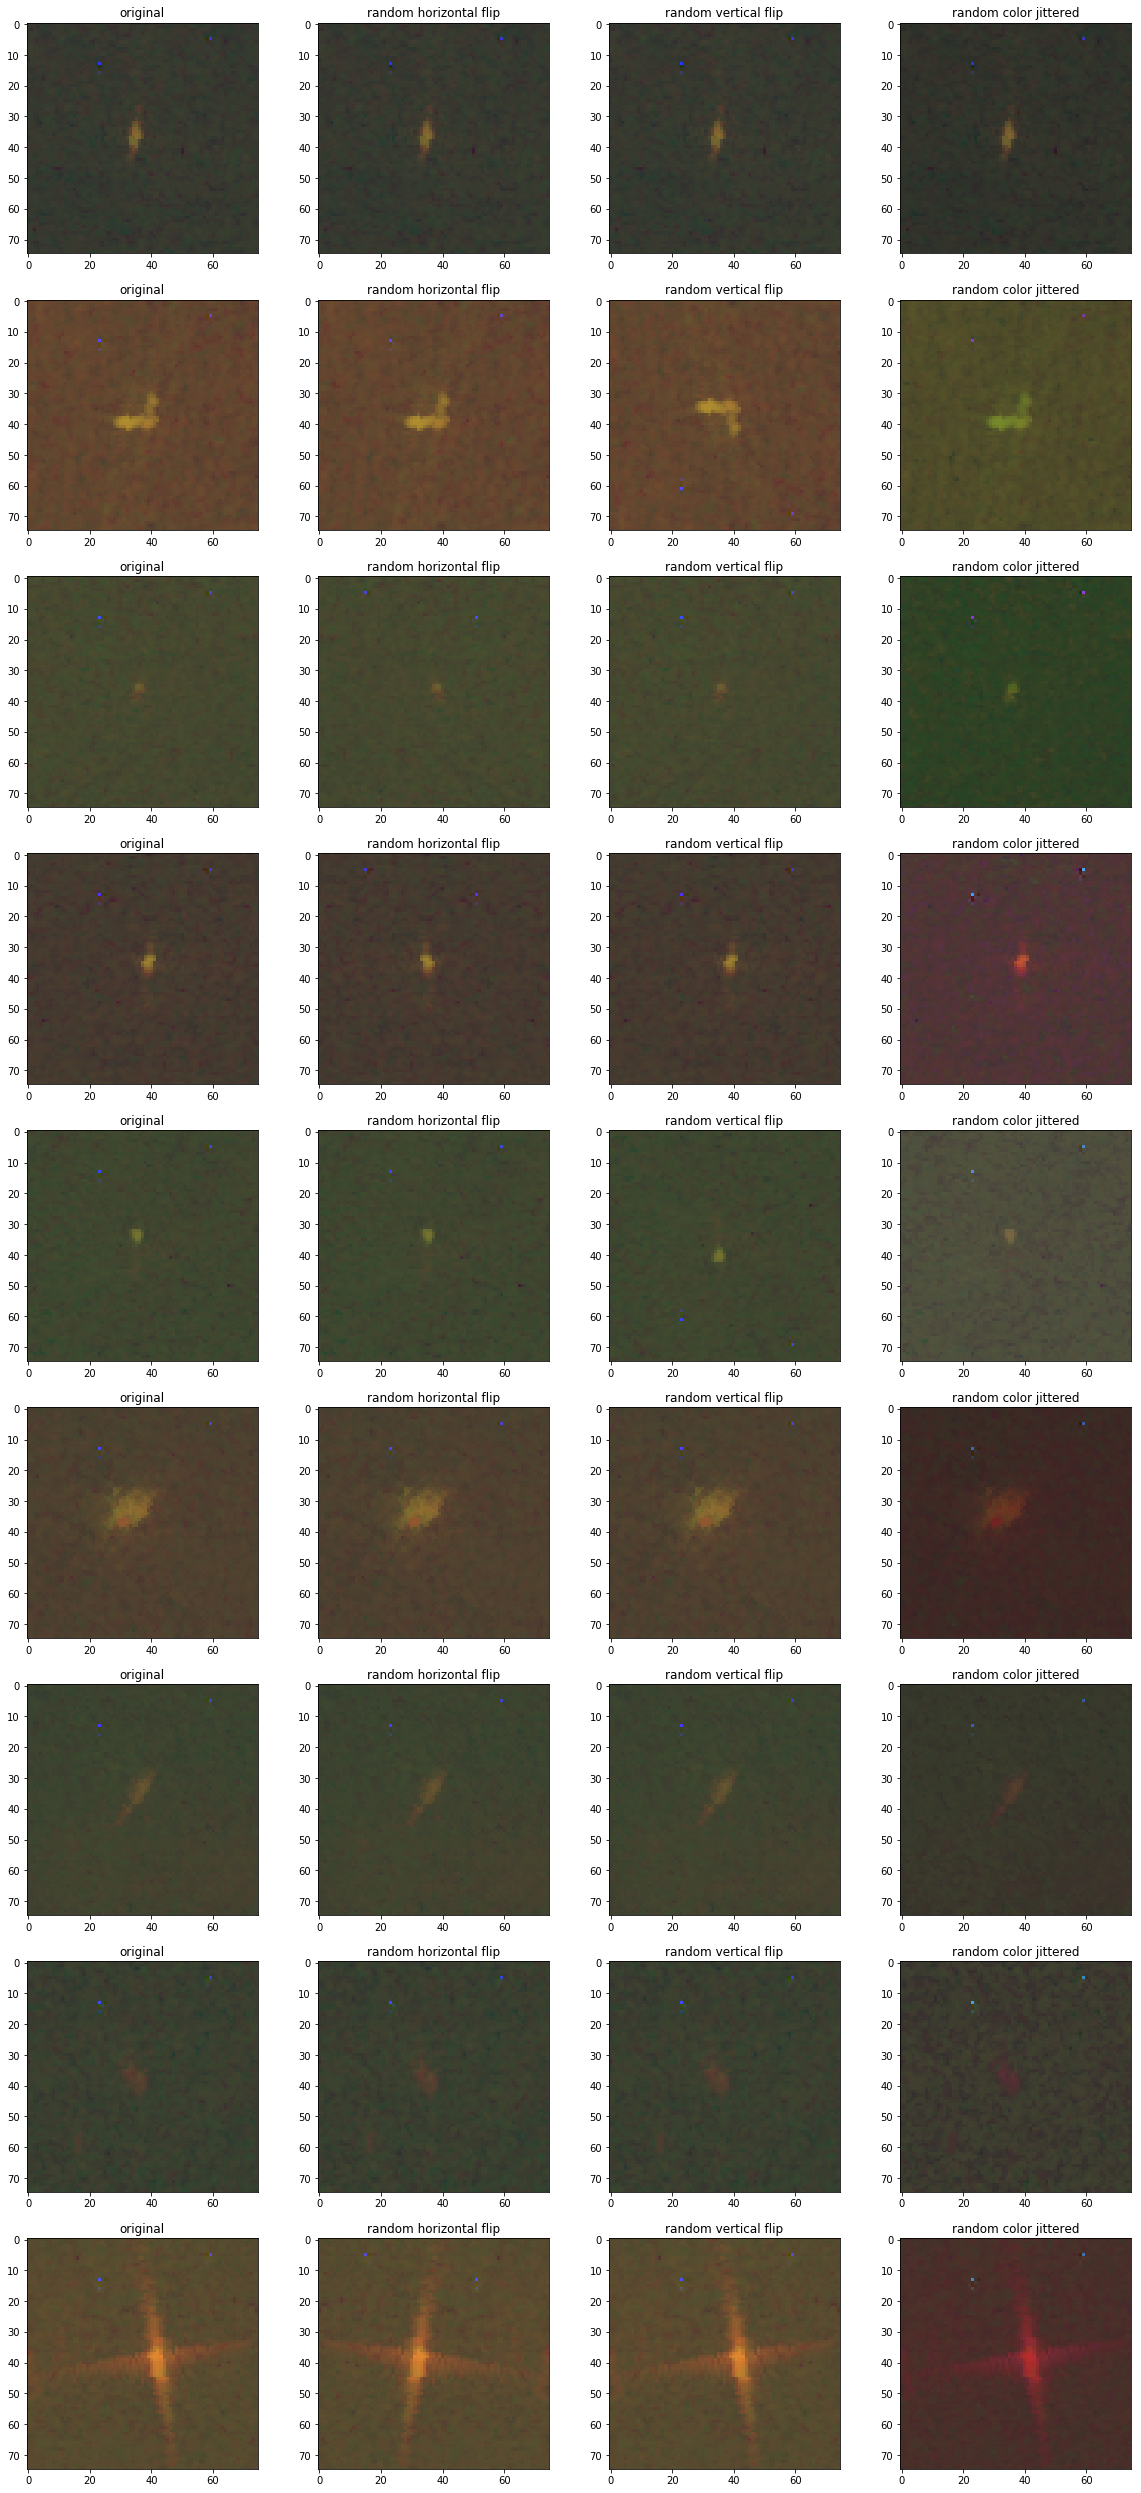

In [6]:
fig = plt.figure(1,figsize=(20,45))
for i in range(9):
    img = train.ix[i,'band_mixed']
    pil_func = tv.transforms.ToPILImage()
    img = pil_func(np.array(img).astype(np.uint8))
    print(img)
    
    ax = fig.add_subplot(9,4,4*i+1)
    ax.imshow(img)
    ax.set_title('original')
    
    af = tv.transforms.RandomHorizontalFlip()
    ax = fig.add_subplot(9,4,4*i+2)
    ax.imshow(af(img))
    ax.set_title('random horizontal flip')
    
    af = tv.transforms.RandomVerticalFlip()
    ax = fig.add_subplot(9,4,4*i+3)
    ax.imshow(af(img))
    ax.set_title('random vertical flip')
    
    af = tv.transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1)
    ax = fig.add_subplot(9,4,4*i+4)
    ax.imshow(af(img))
    ax.set_title('random color jittered')
    
plt.show()